By: Dominikus Krisna Herlambang | ©2024

### GBC = Gradient Boosting Classifier

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/kaggle/input/weather-prediction/seattle-weather.csv


In [ ]:
weather = pd.read_csv('weather-seattle.csv')

In [ ]:
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
weather.shape

(1461, 6)

In [ ]:
weather.isna().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

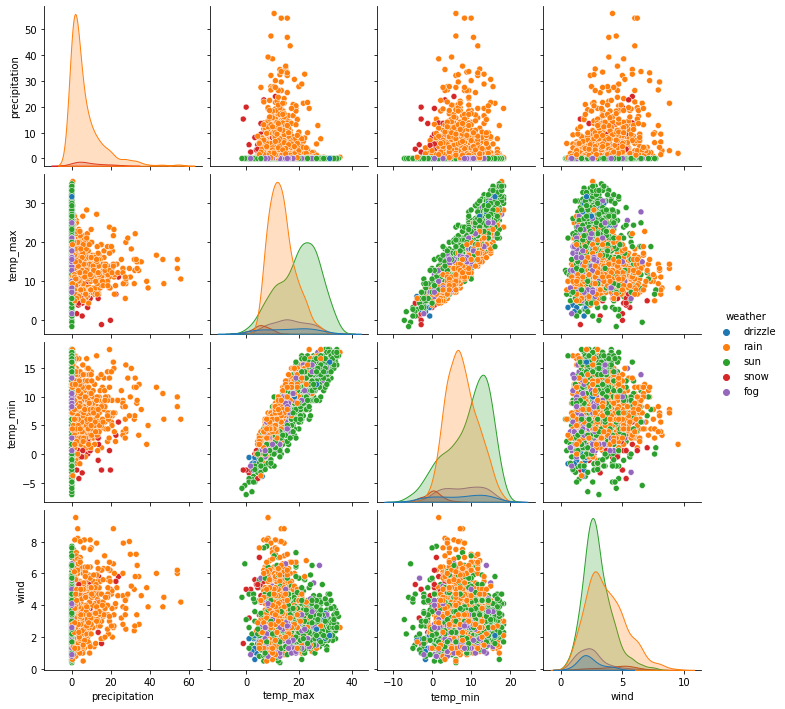

In [ ]:
sns.pairplot(data=weather, hui='weather')

<AxesSubplot:>

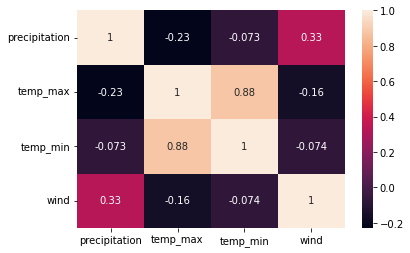

In [ ]:
sns.heatmap(data=weather.corr(),annot=True)

<AxesSubplot:xlabel='weather', ylabel='count'>

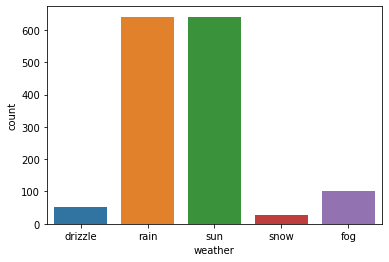

In [ ]:
sns.countplot(data=weather, x='weather')

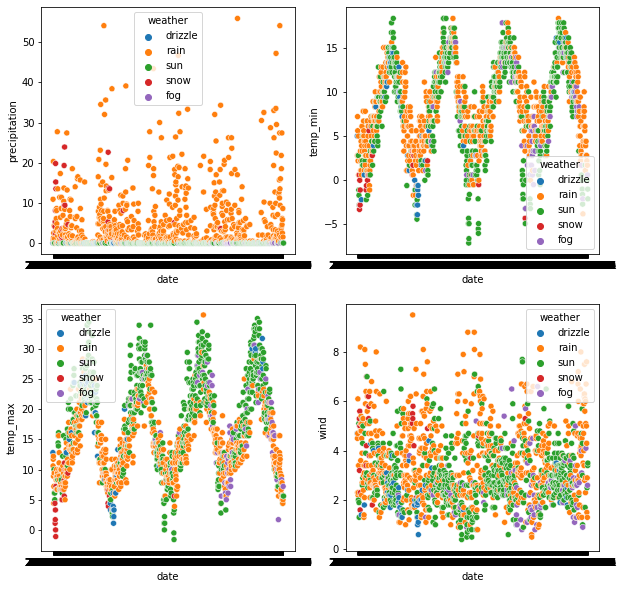

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
for i in range(4):
    sns.scatterplot(data=weather, x='date', y=cols[], hui='weather', ax=axes[i%2,i//2])

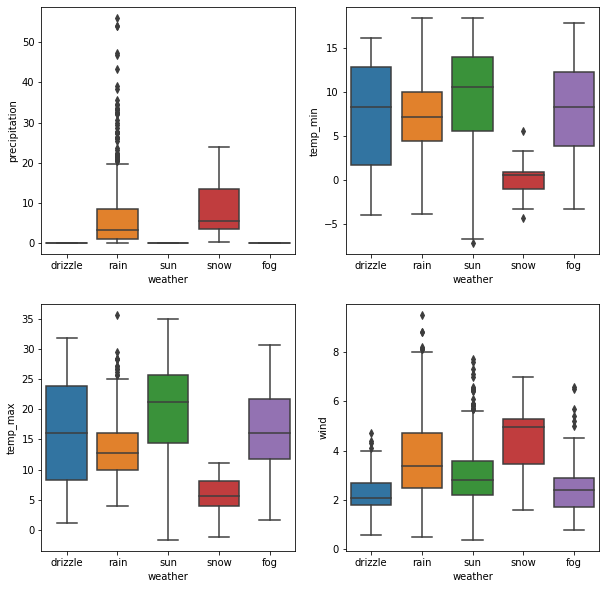

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
for i in range(4):
    sns.boxplot(x='weather', y=cols[], data=weather, ax=axes[i%2,i//2])

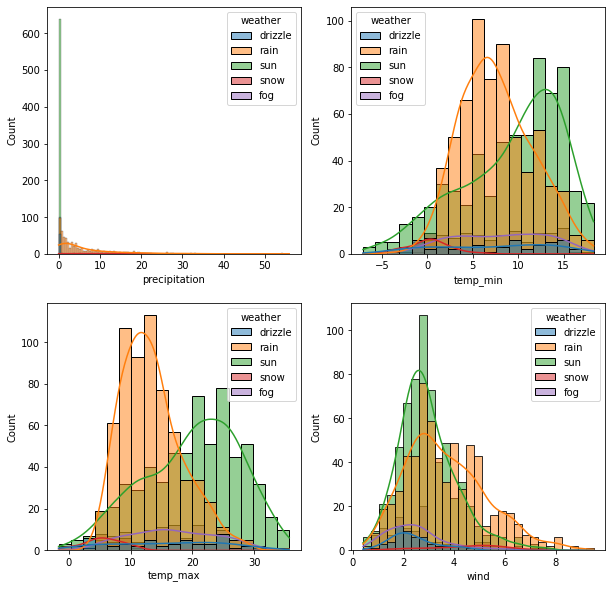

In [ ]:
fig.clear()
fig,axes = plt.subplots(2,2, figsize=(10,10))
for i in range(4):
    sns.histplot(kde=True, data=weather, x=cols[], hue='weather', ax= axes[i%2, i//2])

In [ ]:
def iqroutliers(data,x):
    first_halve = np.quantile(data[x],0.25)
    third_halve = np.quantile(data[x],0.75)
    iqr = third_halve - first_halve
    outlier_values = data[x][(data[x]> iqr + 1.5 * iqr) | (data[x]< iqr - 1.5*iqr) ]
    outlier_index = outlier_values.index
    print(outlier_values)
    return list(outlier_values), list(outlier_index)

In [ ]:
def removeoutliers(data,x):
    val,ind = iqroutliers(data,x)
    data.drop(ind, axis=0, inplace=True)

In [ ]:
cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

for i in range(len(cols)):
    iqroutliers(weather,cols[i])

1       10.9
3       20.3
16       8.1
17      19.8
18      15.2
        ... 
1441    16.0
1446    21.8
1447    18.5
1450    27.4
1456     8.6
Name: precipitation, Length: 206, dtype: float64
216     33.9
217     33.9
224     30.6
225     30.6
227     31.1
        ... 
1309    30.6
1318    30.0
1325    30.0
1326    31.7
1334    29.4
Name: temp_max, Length: 71, dtype: float64
378    -4.4
704    -4.9
705    -4.3
706    -7.1
707    -6.6
708    -4.9
766    -5.5
767    -6.0
768    -4.9
1063   -4.3
1064   -4.9
Name: temp_min, dtype: float64
0       4.7
3       4.7
4       6.1
10      5.1
13      5.3
       ... 
1446    6.0
1447    5.1
1449    6.7
1451    5.0
1452    7.6
Name: wind, Length: 258, dtype: float64


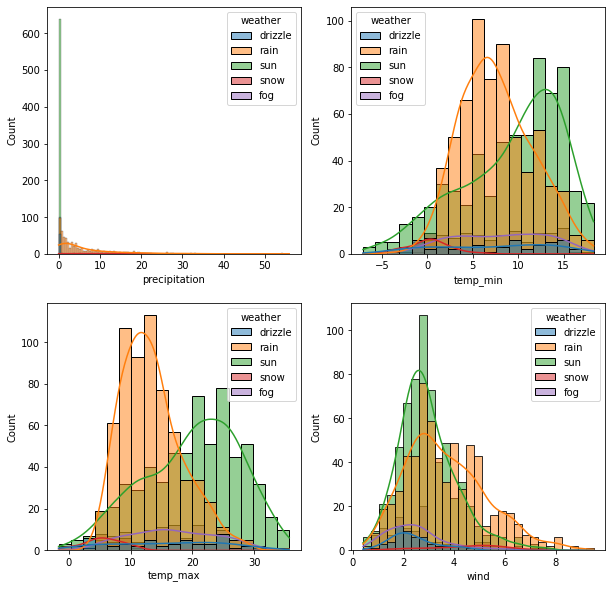

In [ ]:
fig.clear()
fig,axes = plt.subplots(2,2, figsize=(10,10))
for i in range(4):
    sns.histplot(kde=True, data=weather, x=cols[], hue='weather', ax= axes[i%2, i//2])

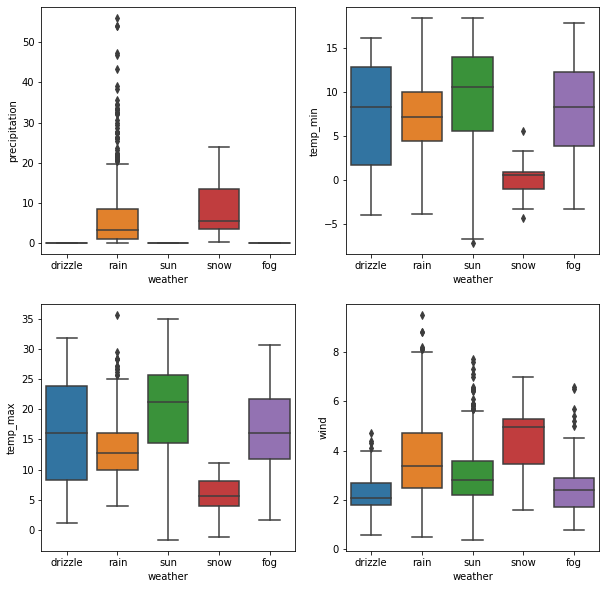

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
for i in range(4):
    sns.boxplot(x='weather', y=cols[], data=weather, ax=axes[i%2,i//2])

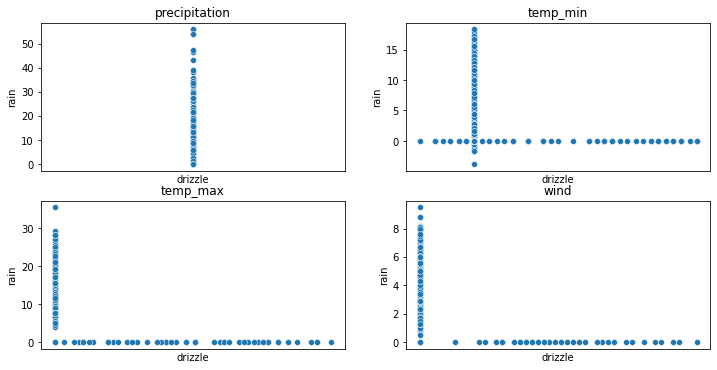

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12,6))
for i in range(len(cols)):
    sns.scatterplot(data=weather.pivot(index='date',columns='weather', values=cols[i]).fillna(0), x='drizzle', y='rain', ax=axes[i%2,i//2])
    axes[i%2,i//2].set_title(cols[])
    axes[i%2,i//2].set_xticks([])
plt.show()

In [ ]:
def normalizethis(data,cols):
    for x in cols:
        data[x] = data[x]/data[x].max()

In [ ]:
normalizethis(weather,cols)

In [ ]:
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.000000,0.359551,0.273224,0.494737,drizzle
1,2012-01-02,0.194991,0.297753,0.153005,0.473684,rain
2,2012-01-03,0.014311,0.328652,0.393443,0.242105,rain
3,2012-01-04,0.363148,0.342697,0.306011,0.494737,rain
4,2012-01-05,0.023256,0.250000,0.153005,0.642105,rain


In [ ]:
y= weather.pop('weather')
weather.pop('date')
X= weather

In [ ]:
X=weather

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier(bootstrap=False)
gbc = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
knn= KNeighborsClassifier()

In [ ]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
gbc.fit(x_train,y_train)
dt.fit(x_train,y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_gbc = gbc.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_knn = knn.predict(x_test)

In [ ]:
print('LogReg Accuracy = {:.2f}'.format(lr.score(x_test,y_test)))
print('RandFor Accuracy = {:.2f}'.format(rf.score(x_test,y_test)))
print('GBC Accuracy = {:.2f}'.format(gbc.score(x_test,y_test)))
print('DT Accuracy = {:.2f}'.format(dt.score(x_test,y_test)))
print('SVC Accuracy = {:.2f}'.format(svc.score(x_test,y_test)))
print('KNN Accuracy = {:.2f}'.format(knn.score(x_test,y_test)))

LogReg Accuracy = 0.76
RandFor Accuracy = 0.82
GBC Accuracy = 0.86
DT Accuracy = 0.78
SVC Accuracy = 0.78
KNN Accuracy = 0.69


In [ ]:
from sklearn.metrics import confusion_matrix

print('LogReg\n',confusion_matrix(y_pred_lr,y_test))
print('RandFor\n', confusion_matrix(y_pred_rf,y_test))
print('GBC\n', confusion_matrix(y_pred_gbc, y_test))

LogReg
 [[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  6   8 164   5  37]
 [  0   0   0   0   0]
 [  9  17  25   0 168]]
RandFor
 [[  2   2   0   0   8]
 [  2   5   1   0  12]
 [  2   0 176   3  10]
 [  0   0   3   2   0]
 [  9  18   9   0 175]]
GBC
 [[  2   0   0   0   2]
 [  1   1   0   0   6]
 [  2   0 177   3   3]
 [  0   0   3   2   0]
 [ 10  24   9   0 194]]


In [ ]:
from sklearn.metrics import classification_report

print('LogReg\n',classification_report(y_test,y_pred_lr, zero_division=0))
print('GBC\n',classification_report(y_test,y_pred_gbc, zero_division=0))
print('RF\n',classification_report(y_test,y_pred_rf, zero_division=0))
print('DT\n',classification_report(y_test,y_pred_dt, zero_division=0))
print('KNN\n',classification_report(y_test,y_pred_knn, zero_division=0))

LogReg
               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        15
         fog       0.00      0.00      0.00        25
        rain       0.75      0.87      0.80       189
        snow       0.00      0.00      0.00         5
         sun       0.77      0.82      0.79       205

    accuracy                           0.76       439
   macro avg       0.30      0.34      0.32       439
weighted avg       0.68      0.76      0.72       439

GBC
               precision    recall  f1-score   support

     drizzle       0.50      0.13      0.21        15
         fog       0.12      0.04      0.06        25
        rain       0.96      0.94      0.95       189
        snow       0.40      0.40      0.40         5
         sun       0.82      0.95      0.88       205

    accuracy                           0.86       439
   macro avg       0.56      0.49      0.50       439
weighted avg       0.82      0.86      0.83       439

RF
      

In [ ]:
y_train.value_counts()\

rain       452
sun        435
fog         76
drizzle     38
snow        21
Name: weather, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy={'sun':y_train.value_counts()['sun'],'rain':y_train.value_counts()['rain'],'fog':int(y_train.value_counts()['fog']*1.2),
                              'drizzle':int(y_train.value_counts()['drizzle']*1.3), 'snow':int(y_train.value_counts()['snow']*1.5)},random_state=0)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, sampling_strategy={'sun':int(y_res.value_counts()['sun']*0.8),'rain':int(y_res.value_counts()['rain']*0.9),
                                                            'fog':y_res.value_counts()['fog'],'drizzle':y_res.value_counts()['drizzle'], 'snow':y_res.value_counts()['snow']})
X_resampled, y_resampled = rus.fit_resample(X_res, y_res)
print(sorted(Counter(y_resampled).items()))

[('drizzle', 49), ('fog', 91), ('rain', 406), ('snow', 31), ('sun', 348)]


In [ ]:
gbc.fit(X_res,y_res)
gbc.score(x_test,y_test)
y_pred2_gbc = gbc.predict(x_test)
print(classification_report(y_test,y_pred2_gbc))

              precision    recall  f1-score   support

     drizzle       0.40      0.13      0.20        15
         fog       0.22      0.16      0.19        25
        rain       0.96      0.93      0.95       189
        snow       0.33      0.40      0.36         5
         sun       0.82      0.91      0.87       205

    accuracy                           0.85       439
   macro avg       0.55      0.51      0.51       439
weighted avg       0.83      0.85      0.83       439



In [ ]:
rf.fit(X_res,y_res)
rf.score(x_test,y_test)

0.8018223234624146

In [ ]:
lr.fit(X_res,y_res)
lr.score(x_test,y_test)

0.7608200455580866

In [ ]:
print('GBC\n',classification_report(y_test,gbc.predict(x_test), zero_division=0))
print('RF\n',classification_report(y_test,rf.predict(x_test), zero_division=0))

GBC
               precision    recall  f1-score   support

     drizzle       0.40      0.13      0.20        15
         fog       0.22      0.16      0.19        25
        rain       0.96      0.93      0.95       189
        snow       0.33      0.40      0.36         5
         sun       0.82      0.91      0.87       205

    accuracy                           0.85       439
   macro avg       0.55      0.51      0.51       439
weighted avg       0.83      0.85      0.83       439

RF
               precision    recall  f1-score   support

     drizzle       0.12      0.13      0.12        15
         fog       0.26      0.20      0.23        25
        rain       0.92      0.92      0.92       189
        snow       0.29      0.40      0.33         5
         sun       0.82      0.83      0.82       205

    accuracy                           0.80       439
   macro avg       0.48      0.50      0.49       439
weighted avg       0.80      0.80      0.80       439



In [ ]:
gbc.fit(X_resampled,y_resampled)
gbc.score(x_test,y_test)

0.8382687927107062

In [ ]:
print(classification_report(y_test,gbc.predict(x_test)))

              precision    recall  f1-score   support

     drizzle       0.33      0.13      0.19        15
         fog       0.16      0.12      0.14        25
        rain       0.95      0.94      0.94       189
        snow       0.40      0.40      0.40         5
         sun       0.83      0.90      0.86       205

    accuracy                           0.84       439
   macro avg       0.53      0.50      0.51       439
weighted avg       0.82      0.84      0.83       439



In [ ]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(gbc.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, random_state=0, n_jobs = -1)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0)

In [ ]:
y_pred_rf_hyp = rf_random.predict(x_train)

In [ ]:
rf_beast = rf_random.best_estimator_

In [ ]:
rf_beast.score(x_test,y_test)

0.8747152619589977

In [ ]:
y_mod2 = y[(y!='drizzle') & (y!='fog')]

In [ ]:
weather_mod2 = weather.iloc[y[(y!='drizzle') & (y!='fog')].index,:]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(weather_mod2,y_mod2,test_size=0.3)

In [ ]:
gbc.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
print('GBC\n',classification_report(y_test,gbc.predict(x_test)))
print('RF\n',classification_report(y_test,rf.predict(x_test)))

GBC
               precision    recall  f1-score   support

        rain       0.96      0.90      0.93       183
        snow       0.50      0.38      0.43         8
         sun       0.93      1.00      0.96       202

    accuracy                           0.94       393
   macro avg       0.80      0.76      0.77       393
weighted avg       0.94      0.94      0.94       393

RF
               precision    recall  f1-score   support

        rain       0.98      0.90      0.94       183
        snow       0.67      0.50      0.57         8
         sun       0.93      1.00      0.96       202

    accuracy                           0.94       393
   macro avg       0.86      0.80      0.82       393
weighted avg       0.94      0.94      0.94       393



In [ ]:
print('Parameters currently in use:\n')
pprint(gbc.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
